In [0]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
from scipy import signal
from math import pi
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### Data Import

In [0]:
# directory (dependent on what comp being used)
data_dir='./gdrive/My Drive/BMME890_MachineLearning/ProjectData'
#data_dir ='C:/Users/nmrubin/Desktop/BMME890MachineLearningProject/GoogleDrive/ProjectData'

#import neutral position emg data
#loadmat can't work with matlab v 7.3, use h5py

#ordered by subjects 1-8
Subjects= ['LV','KH','XH','HS','RC','NR','YZ','AM']

EMG_dir = data_dir + '/EMGData/'
Force_dir = data_dir + '/ForceData/'
Spks_dir = data_dir + '/SpikeTrainsData/'
# print(Subjects)

#later -> go through all subjects
for i in range(len(Subjects)): #Subject
    Subj = Subjects[i]

#for now one subject
Subj = 'LV'

In [0]:
#Fs = 1000 Hz

ForceFs = 1000

with h5py.File(Force_dir + Subj + '_Forces.mat', 'r') as file:
    ForceNI = np.array(file['ForceNItrial'])
    ForceNItime = np.array(file['ForceNItime'])
    ForceNM = np.array(file['ForceNMtrial'])
    ForceNMtime = np.array(file['ForceNMtime'])
    ForceNR = np.array(file['ForceNRtrial'])
    ForceNRtime = np.array(file['ForceNRtime'])
    ForceNP = np.array(file['ForceNPtrial'])
    ForceNPtime = np.array(file['ForceNPtime'])
    
    ForcePI = np.array(file['ForcePItrial'])
    ForcePItime = np.array(file['ForcePItime'])
    ForcePM = np.array(file['ForcePMtrial'])
    ForcePMtime = np.array(file['ForcePMtime'])
    ForcePR = np.array(file['ForcePRtrial'])
    ForcePRtime = np.array(file['ForcePRtime'])
    ForcePP = np.array(file['ForcePPtrial'])
    ForcePPtime = np.array(file['ForcePPtime'])
    
    ForceSI = np.array(file['ForceSItrial'])
    ForceSItime = np.array(file['ForceSItime'])
    ForceSM = np.array(file['ForceSMtrial'])
    ForceSMtime = np.array(file['ForceSMtime'])
    ForceSR = np.array(file['ForceSRtrial'])
    ForceSRtime = np.array(file['ForceSRtime'])
    ForceSP = np.array(file['ForceSPtrial'])
    ForceSPtime = np.array(file['ForceSPtime'])

In [0]:
#load emg data
#careful, will take up ~4-8GB Memory

#NPS = Neutral/Pronated/Supinated
#IMRP = Index/Middle/Ring/Pinky

#pick sample rate for appropriate subject
if Subj == 'LV':
    EMGFs =  2.5621e+03
else:
    EMGFs =  2.0497e+03

with h5py.File(EMG_dir + Subj + '_EMGtrials.mat', 'r') as file:
    EMGNI = np.array(file['EMGNI'])
    EMGNM = np.array(file['EMGNM'])
    EMGNR = np.array(file['EMGNR'])
    EMGNP = np.array(file['EMGNP'])
    
    EMGPI = np.array(file['EMGPI'])
    EMGPM = np.array(file['EMGPM'])
    EMGPR = np.array(file['EMGPR'])
    EMGPP = np.array(file['EMGPP'])
    
    EMGSI = np.array(file['EMGSI'])
    EMGSM = np.array(file['EMGSM'])
    EMGSR = np.array(file['EMGSR'])
    EMGSP = np.array(file['EMGSP'])
    
#first repetition is skipped in case of user-adjustments at beginning of trial, cut off first 19 seconds of EMG data to match with force
cutind = int(np.floor(19*EMGFs))
EMGNI = EMGNI[:,cutind:]
EMGNM = EMGNM[:,cutind:]
EMGNR = EMGNR[:,cutind:]
EMGNP = EMGNP[:,cutind:]

EMGPI = EMGPI[:,cutind:]
EMGPM = EMGPM[:,cutind:]
EMGPR = EMGPR[:,cutind:]
EMGPP = EMGPP[:,cutind:]

EMGSI = EMGSI[:,cutind:]
EMGSM = EMGSM[:,cutind:]
EMGSR = EMGSR[:,cutind:]
EMGSP = EMGSP[:,cutind:]

In [0]:
#load spiketrain data

#SpkTrn_PostureDecomposed_PostureforTrial_Finger
#e.g. SpkTrnNSI = Neutral MUs, Supinated Trial, Index Finger
#e.g. SpkTrnPPM = Pronated MUs, Pronated Trial, Middle Finger

#compare Neutral MUs against MUs decomposed in Pronated/Supinated positions

with h5py.File(Spks_dir + Subj + '_MUsyncscompiled.mat', 'r') as file:
    
    SpkTrnNNI = np.array(file['SpkTrnNNI'])
    SpkTrnNNM = np.array(file['SpkTrnNNM'])
    SpkTrnNNR = np.array(file['SpkTrnNNR'])
    SpkTrnNNP = np.array(file['SpkTrnNNP'])
    
    SpkTrnNPI = np.array(file['SpkTrnNPI'])
    SpkTrnNPM = np.array(file['SpkTrnNPM'])
    SpkTrnNPR = np.array(file['SpkTrnNPR'])
    SpkTrnNPP = np.array(file['SpkTrnNPP'])
    
    SpkTrnNSI = np.array(file['SpkTrnNSI'])
    SpkTrnNSM = np.array(file['SpkTrnNSM'])
    SpkTrnNSR = np.array(file['SpkTrnNSR'])
    SpkTrnNSP = np.array(file['SpkTrnNSP'])
      
#     SpkTrnPNI = np.array(file['SpkTrnPNI'])
#     SpkTrnPNM = np.array(file['SpkTrnPNM'])
#     SpkTrnPNR = np.array(file['SpkTrnPNR'])
#     SpkTrnPNP = np.array(file['SpkTrnPNP'])
    
    SpkTrnPPI = np.array(file['SpkTrnPPI'])
    SpkTrnPPM = np.array(file['SpkTrnPPM'])
    SpkTrnPPR = np.array(file['SpkTrnPPR'])
    SpkTrnPPP = np.array(file['SpkTrnPPP'])
    
#     SpkTrnPSI = np.array(file['SpkTrnPSI'])
#     SpkTrnPSM = np.array(file['SpkTrnPSM'])
#     SpkTrnPSR = np.array(file['SpkTrnPSR'])
#     SpkTrnPSP = np.array(file['SpkTrnPSP'])

#     SpkTrnSNI = np.array(file['SpkTrnSNI'])
#     SpkTrnSNM = np.array(file['SpkTrnSNM'])
#     SpkTrnSNR = np.array(file['SpkTrnSNR'])
#     SpkTrnSNP = np.array(file['SpkTrnSNP'])
    
#     SpkTrnSPI = np.array(file['SpkTrnSPI'])
#     SpkTrnSPM = np.array(file['SpkTrnSPM'])
#     SpkTrnSPR = np.array(file['SpkTrnSPR'])
#     SpkTrnSPP = np.array(file['SpkTrnSPP'])
    
    SpkTrnSSI = np.array(file['SpkTrnSSI'])
    SpkTrnSSM = np.array(file['SpkTrnSSM'])
    SpkTrnSSR = np.array(file['SpkTrnSSR'])
    SpkTrnSSP = np.array(file['SpkTrnSSP'])

Note: After cutoff of EMG data it still has 1 extra index compared to SpkTrn, not sure why

In [0]:
print(np.shape(EMGNI))
print(np.shape(SpkTrnNNI))
print()
print(np.shape(EMGSM))
print(np.shape(SpkTrnSSM))
print(np.shape(SpkTrnNSM))

(160, 412873)
(23, 412873)

(160, 412872)
(32, 412872)
(34, 412872)


In [0]:
print('Time per trial (seconds)')
forcetime = np.size(ForceNP)/1000
spktime = np.shape(SpkTrnNNM)[1]/EMGFs
emgtime = np.shape(EMGPI)[1]/EMGFs
print('Force Time')
print(forcetime)
print('EMG Time')
print(emgtime)
print('SpkTrain Time')
print(spktime)

Time per trial (seconds)
Force Time
161.0
EMG Time
161.11392997931384
SpkTrain Time
161.1318840014051


In [0]:
#check shape of data as it is now
print('Shape of data')
print('Force shape')
print(np.shape(ForceNI))
print('EMG shape')
print(np.shape(EMGNI))
print('Spike Train shape')
print(np.shape(SpkTrnNNI))

Shape of data
Force shape
(1, 161000)
EMG shape
(160, 412873)
Spike Train shape
(23, 412873)


Get RMS for EMG signals of top 85 channels

In [0]:
#calculate average rms of top channels
#check this
def rms(matrix,axis):
  
  return np.sqrt(np.mean(matrix**2,axis=axis))

def rms_top_channels(matrix,topN):
  rmsmatrix=rms(matrix,1)
  channelInd=np.argpartition(rmsmatrix,-topN)[-topN:] 
  topchannels=np.mean(matrix[channelInd,:],axis=0)
  return topchannels

In [0]:
#get mean rms values of top 85 channels
NIrms=rms_top_channels(EMGNI,85)
NMrms=rms_top_channels(EMGNM,85)
NRrms=rms_top_channels(EMGNR,85)
NPrms=rms_top_channels(EMGNP,85)

PIrms=rms_top_channels(EMGPI,85)
PMrms=rms_top_channels(EMGPM,85)
PRrms=rms_top_channels(EMGPR,85)
PPrms=rms_top_channels(EMGPP,85)

SIrms=rms_top_channels(EMGSI,85)
SMrms=rms_top_channels(EMGSM,85)
SRrms=rms_top_channels(EMGSR,85)
SPrms=rms_top_channels(EMGSP,85)
#remove number of steps corresponding to extra time from emg data
# NIrms=NIchannels[:,int((len(NIrms[0])*1/EMGFs-len(ForceNI)*1/1000)*EMGFs):]
# NMrms=NIchannels[:,int((len(NMrms[0])*1/EMGFs-len(ForceNM)*1/1000)*EMGFs):]

In [0]:
#calculate a rolling window, 500ms long incremented by 100ms
#need to have windows of the average times as well (i.e. [.25, .35, .45...etc])
def rolling_windows(signal,window,step,frequency):
    
    #check which dimension is time/longer
    dim = np.argmax(np.shape(signal))
    
    windowSize=round(window*frequency)  
    stepSize=round(step*frequency)
    windows=[]
    windtimes = []
    for start in np.arange(0,signal.shape[dim]-windowSize+1,stepSize):
        
        #track window times
        if start == 0: #start at half a window
            windtimes.append(window/2)
        else: #increment by one window step size
            windtimes.append(windtimes[-1] + step)
        
        end=start+windowSize
        
        if len(np.shape(signal)) == 1: #if column vector
            windows.append(np.array(signal[start:end]))
        else:
            if dim == 0:
                windows.append(np.array(signal[start:end,:])) #go down rows
            else:
                windows.append(np.array(signal[:,start:end])) #go down column
    
    return windows,windtimes

#get indices of the windows needed for cross-validation
def crossvalidataprep(windtimes):
    windtimes = np.array(windtimes)
    crossvalsectind = []
    Crossvaltimes = [0,26,49,72,95,118,141] #seconds, timing cutoffs for each repetition (7 total, last 141-end)
    for i in range(len(Crossvaltimes)):
        if i == 0:
            crossvalsectind.append(0)
        else:
            tmp = windtimes - Crossvaltimes[i]
            crossvalsectind.append(np.argmin(np.abs(tmp)))          
    return crossvalsectind
#crossvalsectind is vector of 6 values
#section 1 = crossvalind[0] thru crossvalidind[1]-1
#section 7 = crossvalind[end] to last window in signal

In [0]:
# STILL NEEDS FIXING. unsure where it's wrong, adapted from first presentation

#Calculate firing rate of Spike Train across windows

# def FRwind(SpkTrn,WinLength,StepLength,EMGFs):
SpkTrn = SpkTrnNNI
# dim = np.argmax(np.shape(signal))
emglength = np.shape(SpkTrn)[1]
WinLength = 0.5 #seconds
StepLength = 0.1
WinNumSample = int(EMGFs*WinLength)
StepNumSample = int(EMGFs*StepLength)
TimeMax = emglength/EMGFs
TimeWin = np.arange(WinNumSample/EMGFs,TimeMax,StepNumSample/EMGFs,dtype='float')
timeemg = np.arange(1/EMGFs,(1+emglength)/EMGFs,1/EMGFs,dtype='float')

FR = []

MUs = np.shape(SpkTrn)[0]

for i in range(np.size(TimeWin)):
    if i == 0: #first window
        windstartind = 0
        windstopind = np.argmin(abs(timeemg - WinLength))
    
    else: #move window forward
        windstartind = windstartind + StepNumSample + 1
        windstopind = windstopind + StepNumSample + 1
        
    if windstopind > emglength: #if next window goes past length of EMG, cut it off early
        windstopind = emglength
        WinLength = (windstopind - windstartind + 1)/EMGFs #last window time for new FR computation
    
    #compute firing rate in window
    FRtemp = np.zeros((1,MUs))
    for mu in range(MUs):
        FRtemp[0,mu] = np.count_nonzero(SpkTrn[windstartind:windstopind,mu])/WinLength
    
    FR.append((np.mean(FRtemp))) #get average firing rate
        
    if windstopind == emglength: #end of that was last window
        break
#     return FR

In [0]:
EMGNIwind,EMGNIwindtimes = rolling_windows(NIrms,.5,.1,EMGFs)
ForceNIwind,ForceNIwindtimes = rolling_windows(ForceNI,.5,.1,1000)
EMGNMwind,EMGNMwindtimes = rolling_windows(NMrms,.5,.1,EMGFs)
ForceNMwind,ForceNMwindtimes = rolling_windows(ForceNM,.5,.1,1000)
EMGNRwind,EMGNRwindtimes = rolling_windows(NRrms,.5,.1,EMGFs)
ForceNRwind,ForceNRwindtimes = rolling_windows(ForceNR,.5,.1,1000)
EMGNPwind,EMGNPwindtimes = rolling_windows(NPrms,.5,.1,EMGFs)
ForceNPwind,ForceNPwindtimes = rolling_windows(ForceNP,.5,.1,1000)
EMGPIwind,EMGPIwindtimes = rolling_windows(PIrms,.5,.1,EMGFs)
ForcePIwind,ForcePIwindtimes = rolling_windows(ForcePI,.5,.1,1000)
EMGPMwind,EMGPMwindtimes = rolling_windows(PMrms,.5,.1,EMGFs)
ForcePMwind,ForcePMwindtimes = rolling_windows(ForcePM,.5,.1,1000)
EMGPRwind,EMGPRwindtimes = rolling_windows(PRrms,.5,.1,EMGFs)
ForcePRwind,ForcePRwindtimes = rolling_windows(ForcePR,.5,.1,1000)
EMGPPwind,EMGPPwindtimes = rolling_windows(PPrms,.5,.1,EMGFs)
ForcePPwind,ForcePPwindtimes = rolling_windows(ForcePP,.5,.1,1000)
EMGSIwind,EMGSIwindtimes = rolling_windows(SIrms,.5,.1,EMGFs)
ForceSIwind,ForceSIwindtimes = rolling_windows(ForceSI,.5,.1,1000)
EMGSMwind,EMGSMwindtimes = rolling_windows(SMrms,.5,.1,EMGFs)
ForceSMwind,ForceSMwindtimes = rolling_windows(ForceSM,.5,.1,1000)
EMGSRwind,EMGSRwindtimes = rolling_windows(SRrms,.5,.1,EMGFs)
ForceSRwind,ForceSRwindtimes = rolling_windows(ForceSR,.5,.1,1000)
EMGSPwind,EMGSPwindtimes = rolling_windows(SPrms,.5,.1,EMGFs)
ForceSPwind,ForceSPwindtimes = rolling_windows(ForceSP,.5,.1,1000)
#should be same # windows for all of them, only need this once
crossvalsectind = crossvalidataprep(EMGNIwindtimes)

Cross-Correlate EMG/SpikeTrains & Force Data to account for delay; still needs solving

499


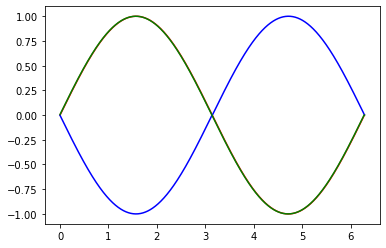

In [0]:
def crosscorr(a,b):
  lag=np.correlate(a-np.mean(a),b-np.mean(b),mode='full')
  lag=np.argmax(lag)
  return lag
#test cross-correlation not working
x = np.linspace(0,2*pi,1000)
a = np.sin(x)
b = np.roll(a,shift=500)
plt.plot(x,a,color='r')
plt.plot(x,b,color='b')


lag = crosscorr(a,b)
print(lag)
b_new = np.roll(b, shift=int(np.ceil(lag)))
plt.plot(x,b_new,color='g')
plt.show()

In [0]:
#rms
EMGNIrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGNIwind]
EMGNMrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGNMwind]
EMGNRrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGNRwind]
EMGNPrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGNPwind]
EMGNIrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGNIwind]

EMGPIrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGPIwind]
EMGPMrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGPMwind]
EMGPRrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGPRwind]
EMGPPrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGPPwind]

EMGSIrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGSIwind]
EMGSMrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGSMwind]
EMGSRrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGSRwind]
EMGSPrms=[np.mean(rms(np.expand_dims(window,0),1)) for window in EMGSPwind]

# get mean for force windows
ForceNImean=[np.mean(window,axis=1) for window in ForceNIwind]
ForceNMmean=[np.mean(window,axis=1) for window in ForceNMwind]
ForceNRmean=[np.mean(window,axis=1) for window in ForceNRwind]
ForceNPmean=[np.mean(window,axis=1) for window in ForceNPwind]

ForcePImean=[np.mean(window,axis=1) for window in ForcePIwind]
ForcePMmean=[np.mean(window,axis=1) for window in ForcePMwind]
ForcePRmean=[np.mean(window,axis=1) for window in ForcePRwind]
ForcePPmean=[np.mean(window,axis=1) for window in ForcePPwind]

ForceSImean=[np.mean(window,axis=1) for window in ForceSIwind]
ForcePMmean=[np.mean(window,axis=1) for window in ForceSMwind]
ForcePRmean=[np.mean(window,axis=1) for window in ForceSRwind]
ForceSPmean=[np.mean(window,axis=1) for window in ForceSPwind]



PLOT: before-after representative cross-correlation to fix lag-time between force & and emg/SpikeTrain data
Feature Extraction/Engineering:

In [0]:
#remove extra dim
test=np.squeeze(ForceNImean)
test
delay=crosscorr(EMGNIrms,test)

In [0]:
delay

1606

(0, 20)

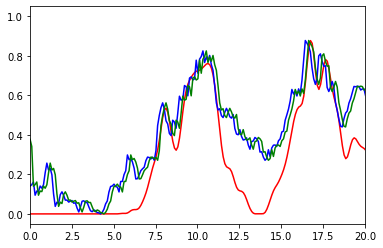

In [0]:
#let's do cross correlation
tfrm_pipeline=Pipeline([('minmax_scaler', MinMaxScaler())])
fi=tfrm_pipeline.fit_transform(np.array(test).reshape(-1,1))
ni=tfrm_pipeline.fit_transform(np.array(EMGNIrms).reshape(-1,1))

ftime=np.linspace(0,161,len(test))
etime=np.linspace(0,161.11,len(EMGNIrms))
plt.plot(ftime,fi,color='r')
plt.plot(etime,ni,color='b')

NIrms_shifted=np.roll(EMGNIrms,shift=-delay)
nis=tfrm_pipeline.fit_transform(NIrms_shifted.reshape(-1,1))
plt.plot(etime,nis,color='g')
plt.xlim(0,20)


In [0]:
# get cross correlations for all above
delayNI=crosscorr(np.squeeze(ForceNImean), EMGNIrms)
delayNM=crosscorr(np.squeeze(ForceNImean), EMGNMrms)
delayNR=crosscorr(np.squeeze(ForceNImean), EMGNRrms)
delayNP=crosscorr(np.squeeze(ForceNImean), EMGNPrms)

delayPI=crosscorr(np.squeeze(ForcePImean), EMGPIrms)
delayPM=crosscorr(np.squeeze(ForcePMmean), EMGPMrms)
delayPR=crosscorr(np.squeeze(ForcePRmean), EMGPRrms)
delayPP=crosscorr(np.squeeze(ForcePPmean), EMGPPrms)

delaySI=crosscorr(np.squeeze(ForceSImean), EMGSIrms)
delaySM=crosscorr(np.squeeze(ForceSMmean), EMGSMrms)
delaySR=crosscorr(np.squeeze(ForceSRmean), EMGSRrms)
delaySP=crosscorr(np.squeeze(ForceSPmean), EMGSPrms)



In [0]:
def trim_delay(delay,data,force):
  trimmedData=pd.DataFrame()
  for feature in data.columns:
    featdata=np.roll(data[feature],shift=-delay)
    featdata=featdata[delay:]
    trimmedData[feature]=featdata
  
  trimmedForce=force[delay:]

  return trimmedData,trimmedForce

EMGNItrim,ForceNItrim=trim_delay(delayNI,EMGNIfeatures,ForceNImean)
EMGNMtrim,ForceNMtrim=trim_delay(delayNM,EMGNMfeatures,ForceNMmean)
EMGNRtrim,ForceNRtrim=trim_delay(delayNR,EMGNRfeatures,ForceNRmean)
EMGNPtrim,ForceNPtrim=trim_delay(delayNP,EMGNPfeatures,ForceNPmean)


EMGPItrim,ForcePItrim=trim_delay(delayPI,EMGPIfeatures,ForcePImean)
EMGPMtrim,ForcePMtrim=trim_delay(delayPM,EMGPMfeatures,ForcePMmean)
EMGPRtrim,ForcePRtrim=trim_delay(delayPR,EMGPRfeatures,ForcePRmean)
EMGPPtrim,ForcePPtrim=trim_delay(delayPP,EMGPPfeatures,ForcePPmean)

EMGSItrim,ForceSItrim=trim_delay(delaySI,EMGSIfeatures,ForceSImean)
EMGSMtrim,ForceSMtrim=trim_delay(delaySM,EMGSMfeatures,ForceSMmean)
EMGSRtrim,ForceSRtrim=trim_delay(delaySR,EMGSRfeatures,ForceSRmean)
EMGSPtrim,ForceSPtrim=trim_delay(delaySP,EMGSPfeatures,ForceSPmean)

PLOT: View correlations of features, remove some/etc.
Regression of Features to Force for Prediction:

Prep Regressors

In [0]:
# ICA: already done
# PCA + K-Means
# EMG Time-Domain & Frequency Domain Features:
#     RMS
#     zero-crossings
# ANN???

In [0]:
# For MUs:
#     Linear (try separate groups/coefficients for each MU, but also try using average Firing rate as one coefficient, what my post-doc has used)
# For EMG:
#     Linear
#     ANN
#     SVM
#     ElasticNet
#     Lasso
#     Random-Forest
#     Kernel-Reaching
#     Gradient-Boost
#     SGD Regressor

In [0]:
# from sklearn.model_selection import cross_val_score,train_test_split,cross_validate
# from sklearn import tree,linear_model,svm
# from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import r2_score
# import scipy.fftpack as syfp
# from sklearn.compose import ColumnTransformer

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
XGBoost = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
LightgBoost = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(KRR, lasso, ENet, GBoost,XGBoost,LightgBoost),
                                meta_regressor=XGBoost,
                                use_features_in_secondary=True)

stack_gen_t = stack_gen.fit(train.values,y_train)

predicted_prices = np.expm1(stack_gen_t.predict(test.values))
Evaluation of Regressors:

In [0]:
# Rather than table maybe bar chart:

# 4 Bar charts (one for each finger):
#     two sets of bars (R^2 + RMSE)
#         one bar for each model:
#             plot Mean +/- SD/SE across subjects
# sort by ranking or model??
# Use Linear for MUs, Linear + other top regressor model for comparison
# Further Analysis
# Comparisons repeated-measure ANOVA?
# Compare R^2/RMSE of MU regression against EMG
# Compare MUs regression of Neutral vs MUs decomposed in other posture